### Placement Assignment Deep Learning 

#### Question 1 - Implement 3 different CNN architectures with a comparison table for the MNSIT dataset using the Tensorflow library.
Note -    
  1. The model parameters for each architecture should not be more than 8000 parameters
  2. Code comments should be given for proper code understanding.
  3. The minimum accuracy for each accuracy should be at least 96%

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense




In [32]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [34]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

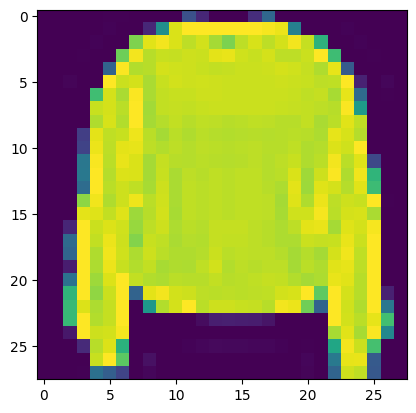

In [35]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [37]:
train_labels[7]

2

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

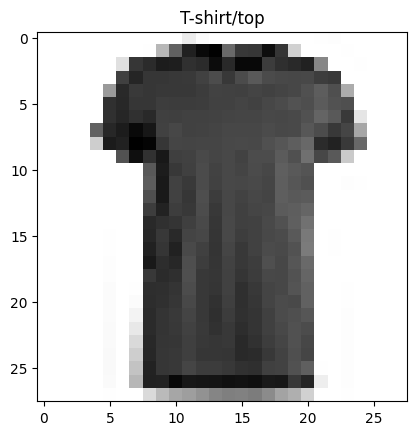

In [39]:
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

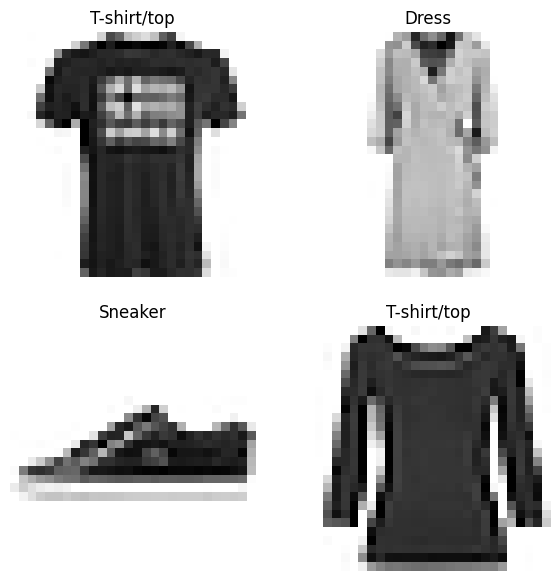

In [40]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [41]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.2972 - accuracy: 0.1813 - val_loss: 2.0275 - val_accuracy: 0.2027
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9951 - accuracy: 0.2163 - val_loss: 1.9546 - val_accuracy: 0.2220
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.7781 - accuracy: 0.2927 - val_loss: 1.5615 - val_accuracy: 0.3613
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4555 - accuracy: 0.3992 - val_loss: 1.3692 - val_accuracy: 0.4328
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3410 - accuracy: 0.4308 - val_loss: 1.3184 - val_accuracy: 0.4341
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2920 - accuracy: 0.4387 - val_loss: 1.2723 - val_accuracy: 0.4507
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2756 - accuracy: 0.4447 - val_loss: 1.3033 - val_accuracy:

In [42]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [44]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [45]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
model_2_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1420 - accuracy: 0.6399 - val_loss: 0.8605 - val_accuracy: 0.7417
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7778 - accuracy: 0.7558 - val_loss: 0.7469 - val_accuracy: 0.7517
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6903 - accuracy: 0.7660 - val_loss: 0.6946 - val_accuracy: 0.7532
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6409 - accuracy: 0.7750 - val_loss: 0.6516 - val_accuracy: 0.7696
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6141 - accuracy: 0.7798 - val_loss: 0.6318 - val_accuracy: 0.7693
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5937 - accuracy: 0.7861 - val_loss: 0.6226 - val_accuracy: 0.7724
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5786 - accuracy: 0.7921 - val_loss: 0.6115 - val_accuracy:

In [46]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 3140      
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_3_history = model_3.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6946 - accuracy: 0.7591 - val_loss: 0.5392 - val_accuracy: 0.8087
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4921 - accuracy: 0.8272 - val_loss: 0.5206 - val_accuracy: 0.8156
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4568 - accuracy: 0.8400 - val_loss: 0.4900 - val_accuracy: 0.8254
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4336 - accuracy: 0.8490 - val_loss: 0.4636 - val_accuracy: 0.8381
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8522 - val_loss: 0.4657 - val_accuracy: 0.8318
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4124 - accuracy: 0.8556 - val_loss: 0.4790 - val_accuracy: 0.8334
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4051 - accuracy: 0.8579 - val_loss: 0.4604 - val_accuracy:

In [51]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 8)                 6280      
                                                                 
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dense_18 (Dense)            (None, 10)                170       
                                                                 
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_4_history = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6710 - accuracy: 0.7635 - val_loss: 0.4923 - val_accuracy: 0.8273
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4556 - accuracy: 0.8397 - val_loss: 0.4813 - val_accuracy: 0.8318
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8527 - val_loss: 0.4516 - val_accuracy: 0.8362
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4017 - accuracy: 0.8586 - val_loss: 0.4539 - val_accuracy: 0.8412
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3919 - accuracy: 0.8615 - val_loss: 0.4538 - val_accuracy: 0.8374
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3822 - accuracy: 0.8642 - val_loss: 0.4509 - val_accuracy: 0.8436
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8665 - val_loss: 0.4434 - val_accuracy:

In [54]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 16)                12560     
                                                                 
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
model_5_history = model_5.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6168 - accuracy: 0.7818 - val_loss: 0.4883 - val_accuracy: 0.8264
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4312 - accuracy: 0.8450 - val_loss: 0.4898 - val_accuracy: 0.8308
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3986 - accuracy: 0.8557 - val_loss: 0.4276 - val_accuracy: 0.8454
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3824 - accuracy: 0.8623 - val_loss: 0.4288 - val_accuracy: 0.8471
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3700 - accuracy: 0.8650 - val_loss: 0.4308 - val_accuracy: 0.8448
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3599 - accuracy: 0.8683 - val_loss: 0.4055 - val_accuracy: 0.8547
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3518 - accuracy: 0.8724 - val_loss: 0.4181 - val_accuracy:

In [57]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 16)                12560     
                                                                 
 dense_23 (Dense)            (None, 32)                544       
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Make predictions with the most recent model
y_probs = model_5.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.4721312e-06, 1.2443785e-08, 1.6733896e-06, 4.6348413e-07,
        4.8799791e-08, 1.7843610e-02, 9.9231940e-08, 5.3386480e-02,
        1.9303094e-04, 9.2857212e-01],
       [8.5838932e-05, 1.6649102e-08, 9.6370870e-01, 2.8061541e-07,
        3.5060398e-02, 5.2228623e-19, 1.1431626e-03, 2.3659949e-26,
        1.6989983e-06, 1.3065013e-27],
       [8.4498760e-07, 9.9999917e-01, 3.4404726e-10, 2.3941464e-08,
        8.4489049e-10, 3.0328141e-18, 5.3644206e-10, 9.7798131e-26,
        1.2142324e-11, 1.0034251e-26],
       [1.3584246e-05, 9.9998128e-01, 1.0576283e-07, 4.6900655e-06,
        1.8918384e-07, 7.0671690e-15, 1.5805259e-07, 1.4310490e-20,
        4.4571871e-09, 3.4798760e-18],
       [1.3093641e-01, 2.6917383e-03, 1.9915229e-01, 4.6620745e-02,
        8.7599427e-02, 4.8370464e-11, 5.2835619e-01, 3.1289625e-16,
        4.6431357e-03, 1.9961620e-10]], dtype=float32)

In [56]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [58]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])